In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

filter = 3

In [2]:
def plot(data, error, ecolor='r', fmt='--', label=None):
    x = data[0, :]
    y = data[1, :]
    plt.errorbar(x, y, yerr=error, ecolor=ecolor, capsize=3, fmt=fmt, label=label)

In [3]:
data_baseline = get_mixrw_rate('../results/MRW-24-30', step=10)
avg_baseline = np.zeros((2, 11))
std_baseline = np.zeros((11))
cnt = 0
for i, d in data_baseline.items():
    avg_baseline[0, cnt] = i
    avg_baseline[1, cnt], std_baseline[cnt] = avg_rate(d, filter=filter)
    cnt += 1

files:
../results/MRW-24-30/MIXREADWRITE-0.0.dat
../results/MRW-24-30/MIXREADWRITE-0.1.dat
../results/MRW-24-30/MIXREADWRITE-0.2.dat
../results/MRW-24-30/MIXREADWRITE-0.3.dat
../results/MRW-24-30/MIXREADWRITE-0.4.dat
../results/MRW-24-30/MIXREADWRITE-0.5.dat
../results/MRW-24-30/MIXREADWRITE-0.6.dat
../results/MRW-24-30/MIXREADWRITE-0.7.dat
../results/MRW-24-30/MIXREADWRITE-0.8.dat
../results/MRW-24-30/MIXREADWRITE-0.9.dat
../results/MRW-24-30/MIXREADWRITE-1.0.dat


In [4]:
data_contention = get_mixrw_rate('../results/Contention-24-30', step=10)
avg_contention = np.zeros((2, 11))
std_contention = np.zeros((11))
cnt = 0
for i, d in data_contention.items():
    avg_contention[0, cnt] = i
    avg_contention[1, cnt], std_contention[cnt] = avg_rate(d, filter=filter)
    cnt += 1

files:
../results/Contention-24-30/MIXREADWRITE-0.0.dat
../results/Contention-24-30/MIXREADWRITE-0.1.dat
../results/Contention-24-30/MIXREADWRITE-0.2.dat
../results/Contention-24-30/MIXREADWRITE-0.3.dat
../results/Contention-24-30/MIXREADWRITE-0.4.dat
../results/Contention-24-30/MIXREADWRITE-0.5.dat
../results/Contention-24-30/MIXREADWRITE-0.6.dat
../results/Contention-24-30/MIXREADWRITE-0.7.dat
../results/Contention-24-30/MIXREADWRITE-0.8.dat
../results/Contention-24-30/MIXREADWRITE-0.9.dat
../results/Contention-24-30/MIXREADWRITE-1.0.dat


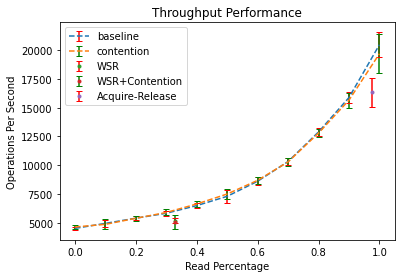

In [5]:
# data refer to WSR.ipynb
x_wsr = 0.33
avg_wsr = 5192.69960600676
std_wsr = 245.4423526570999
avg_wsr_contention = 5068.694748442665
std_wsr_contention = 619.2467422597597

# data refer to lock.ipynb
x_ar = 0.9758419435335849
avg_ar = 16339.990492330637
std_ar = 1272.526032755494

plt.figure()

plot(avg_baseline, std_baseline, ecolor='r', label='baseline')
plot(avg_contention, std_contention, ecolor='g', label='contention')
plot(np.array([[x_wsr], [avg_wsr]]), [std_wsr], ecolor='r', fmt='.', label='WSR')
plot(np.array([[x_wsr], [avg_wsr_contention]]), [std_wsr_contention], ecolor='g', fmt='.', label='WSR+Contention')
plot(np.array([[x_ar], [avg_ar]]), [std_ar], ecolor='r', fmt='.', label='Acquire-Release')

plt.xlabel('Read Percentage')
plt.ylabel('Operations Per Second')
plt.title('Throughput Performance')
plt.legend()
plt.show()